# CCTR691 - NLP Lab

For this lab you will complete this notebook by running all code, generating all images, and answering the questions.  Then add this file to your GitHub repository and push to github.  Submit the URL to this file through CANVAS.

# Part 1: Import your REDCap survey data

In this section we are importing our REDCap survey data into a Pandas Dataframe using the REDCap API functionality and a string manipulation package named StringIO.  If not already enabled, you will need to enable the API functionality through the User Rights section of your REDCap project.

The first step for our lab activities is to import the libraries we will use during the session. In order to use any Python library, even if installed, you will need to load it every time you start a new Python session. Loading libraries is achieved by the command ‚Äúimport‚Äù followed by the library name.

In [1]:
## Confirming our enviornment
!conda info


     active environment : env_cctr691
    active env location : /lustre/home/stadtlerh/anaconda3/envs/env_cctr691
            shell level : 2
       user config file : /lustre/home/stadtlerh/.condarc
 populated config files : /opt/anaconda3-2023.09-0/.condarc
          conda version : 23.7.4
    conda-build version : 3.26.1
         python version : 3.11.5.final.0
       virtual packages : __archspec=1=x86_64
                          __glibc=2.34=0
                          __linux=5.14.0=0
                          __unix=0=0
       base environment : /opt/anaconda3-2023.09-0  (read only)
      conda av data dir : /opt/anaconda3-2023.09-0/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/linux-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/linux-64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /opt/anac

In [3]:
## Import python libraries
import requests
import pandas as pd
from io import StringIO
import re
import spacy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import openpyxl
from spacy import displacy

After loading spaCy, we will need to load the processing pipeline, which is the part of spaCy trained on written web text that includes tools used to process your text. For English, ‚Äúen_core_web_sm‚Äù is the smallest model available, with other versions trained on more data but will take bigger space. https://spacy.io/models/en. SpaCy states in its documentation that ‚Äúnlp‚Äù is the most commonly used name for the loaded pipeline function. We load the pipeline using the command ‚Äúspacy.load()‚Äù with the name of the model inside the brackets. You can make sure that the proper model was loaded through running the loaded pipeline.

In [4]:
nlp = spacy.load("en_core_web_sm")
nlp

### Create API Call and Retrieve Data

In the "token" entry, replace the "ABA571C5EC78E3FB8D4008DABA5DB182" with your custom token that you will find from the API section of your REDCap project.

In [5]:
## Set up REDCap Connection

data = {
    'token': '2DF6E0A33216C4457C46D44272E112AD',
    'content': 'record',
    'action': 'export',
    'format': 'csv',
    'type': 'flat',
    'csvDelimiter': '',
    'rawOrLabel': 'raw',
    'rawOrLabelHeaders': 'raw',
    'exportCheckboxLabel': 'false',
    'exportSurveyFields': 'false',
    'exportDataAccessGroups': 'false',
    'returnFormat': 'json'
}

api_data = requests.post('https://redcap.vcu.edu/api/',data=data)
## View the returned text data
api_data.text

'record_id,instructor,lecture_date,course_module,student_knowledge,instructor_rate___1,instructor_rate___2,instructor_rate___3,instructor_rate___4,instructor_rate___5,instructor_preparation___1,instructor_preparation___2,instructor_preparation___3,instructor_preparation___4,instructor_preparation___5,positive_feedback,negative_feedback,future_directions,cctr691_class_feedback_survey_complete\n1,2,2024-09-03,1,2,0,1,0,0,0,1,0,0,0,0,"I thought this was an informative lecture and brought new concepts to the class- research and reproducibility is important, but I appreciated learning more about how R&R looks in terms of data management and in a space that uses large data sets.","I felt like a lot of the slides could have been summarized more concisely- we didn\'t necessarily need each slide read to us. But I generally prefer expansion, so this really is not a huge deal! ",N/A,2\n2,1,2024-09-03,1,1,1,0,0,0,0,1,0,0,0,0,"great explanation to details in depth  ","none ",,2\n3,2,2024-09-03,1,1,

### Format the data as a Pandas dataframe and view our data

Next, we will use the "pandas" package to read the file through assigning the file path to an object and then using the command "pd.read_csv" from the libraries "pandas". The following code uses StringIO package to stream the csv delimiited text content of thhe API call into the pandas read_csv function, which converts it to a dataframe.


In [6]:
df = pd.read_csv(StringIO(api_data.text), sep=",")
type(df)  ## this command tells you the data type of the df variable. You can put any variable into thhis command to get its data type returned.

pandas.core.frame.DataFrame

In [7]:
## Visualize the dataframe content

df

record_id  instructor lecture_date  course_module  student_knowledge  \
0           1           2   2024-09-03              1                  2   
1           2           1   2024-09-03              1                  1   
2           3           2   2024-09-03              1                  1   
3           4           1   2024-09-03              1                  1   
4           5           1   2024-08-27              1                  2   
5           6           1   2024-09-05              1                  1   
6           7           1   2024-09-05              1                  2   
7           8           1   2024-10-17              3                  1   
8           9           1   2024-10-17              3                  1   
9          10           8   2024-10-15              3                  1   
10         11           2   2024-09-03              1                  2   
11         12           1   2024-10-17              3                  1   

    instructor_rate___1  instructor_rate___2  instructor_rate___3  \
0                     0                    1                    0   
1                     1                    0                    0   
2                     1                    0                    0   
3                     1                    0                    0   
4                     1                    0                    0   
5                     1                    0                    0   
6                     1                    0                    0   
7                     1                    0                    0   
8                     1                    0                    0   
9                     0                    0                    0   
10                    0                    1                    0   
11                    1                    0                    0   

    instructor_rate___4  instructor_rate___5  instructor_preparation___1  \
0                     0                    0                           1   
1                     0                    0                           1   
2                     0                    0                           1   
3                     0                    0                           1   
4                     0                    0                           1   
5                     0                    0                           1   
6                     0                    0                           1   
7                     0                    0                           1   
8                     0                    0                           1   
9                     0                    1                           0   
10                    0                    0                           0   
11                    0                    0                           1   

    instructor_preparation___2  instructor_preparation___3  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
5                            0                           0   
6                            0                           0   
7                            0                           0   
8                            0                           0   
9                            0                           0   
10                           1                           0   
11                           0                           0   

    instructor_preparation___4  instructor_preparation___5  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4          

### Look at dataframe properties

There are a lot of commands to use with a pandas DataFrame by adding them to the DataFrame object (which is df in our case); an example of this is using the command ".head()" to make sure that the data was properly loaded by printing the first 5 rows in the data frame. In the following cells, we will use some commands to look at the DataFrame. We can use the command ".info()" to see a summary of the number of rows, columns, and the non-null values per column, as well as the data type in each column. The command ".describe()" summarizes the numerical columns in the data frame. The command ".isnull()" checks for missing values and adding the command ".sum()" to it provides the number of missing values in each column. Finally, "df.shape" tells us how many rows and columns our dataframe has.

In [8]:
#Display the first few rows of the DataFrame to ensure it's loaded correctly
df.head()

record_id  instructor lecture_date  course_module  student_knowledge  \
0          1           2   2024-09-03              1                  2   
1          2           1   2024-09-03              1                  1   
2          3           2   2024-09-03              1                  1   
3          4           1   2024-09-03              1                  1   
4          5           1   2024-08-27              1                  2   

   instructor_rate___1  instructor_rate___2  instructor_rate___3  \
0                    0                    1                    0   
1                    1                    0                    0   
2                    1                    0                    0   
3                    1                    0                    0   
4                    1                    0                    0   

   instructor_rate___4  instructor_rate___5  instructor_preparation___1  \
0                    0                    0                           1   
1                    0                    0                           1   
2                    0                    0                           1   
3                    0                    0                           1   
4                    0                    0                           1   

   instructor_preparation___2  instructor_preparation___3  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   instructor_preparation___4  instructor_preparation___5  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

                                   positive_feedback  \
0  I thought this was an informative lecture and ...   
1            great explanation to details in depth     
2  Great explanation of electronic health records...   
3         Unfortunately i missed this weeks classes    
4      That we got to create a REDCap form ourselves   

                                   negative_feedback  \
0  I felt like a lot of the slides could have bee...   
1                                              none    
2  Maybe more information about the different typ...   
3         Unfortunately i missed this weeks classes    
4  Various types of questions could have been exp...   

                                   future_directions  \
0                                                NaN   
1                                                NaN   
2  Why Redcap is better or how it is different fr...   
3                                                NaN   
4                                                NaN   

   cctr691_class_feedback_survey_complete  
0                                       2  
1                                       2  
2                                       2  
3                                       2  
4                                       2

In [9]:
# Display the last few rows
df.tail()

record_id  instructor lecture_date  course_module  student_knowledge  \
7           8           1   2024-10-17              3                  1   
8           9           1   2024-10-17              3                  1   
9          10           8   2024-10-15              3                  1   
10         11           2   2024-09-03              1                  2   
11         12           1   2024-10-17              3                  1   

    instructor_rate___1  instructor_rate___2  instructor_rate___3  \
7                     1                    0                    0   
8                     1                    0                    0   
9                     0                    0                    0   
10                    0                    1                    0   
11                    1                    0                    0   

    instructor_rate___4  instructor_rate___5  instructor_preparation___1  \
7                     0                    0                           1   
8                     0                    0                           1   
9                     0                    1                           0   
10                    0                    0                           0   
11                    0                    0                           1   

    instructor_preparation___2  instructor_preparation___3  \
7                            0                           0   
8                            0                           0   
9                            0                           0   
10                           1                           0   
11                           0                           0   

    instructor_preparation___4  instructor_preparation___5  \
7                            0                           0   
8                            0                           0   
9                            0                           1   
10                           0                           0   
11                           0                           0   

                                    positive_feedback  \
7   The breakdown of how NLP works and the importa...   
8   Receiving fundamental information about NLP an...   
9   There was nothing positive about this lecture,...   
10  I have only worked with imaging/electrophysiol...   
11  This was a great intro to a very complicated t...   

                                    negative_feedback future_directions  \
7   The introduction to using Topex was great, but...               NaN   
8                                                 NaN               NaN   
9                              No lecture was given!                NaN   
10  It would have been useful to have covered a li...               NaN   
11  I would have also liked to see the link betwee...               NaN   

    cctr691_class_feedback_survey_complete  
7                                        2  
8                                        2  
9                                        2  
10                                       2  
11                                       2

In [10]:
# Get an overview of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   record_id                               12 non-null     int64 
 1   instructor                              12 non-null     int64 
 2   lecture_date                            12 non-null     object
 3   course_module                           12 non-null     int64 
 4   student_knowledge                       12 non-null     int64 
 5   instructor_rate___1                     12 non-null     int64 
 6   instructor_rate___2                     12 non-null     int64 
 7   instructor_rate___3                     12 non-null     int64 
 8   instructor_rate___4                     12 non-null     int64 
 9   instructor_rate___5                     12 non-null     int64 
 10  instructor_preparation___1              12 non-null     int64 
 11  instruct

In [11]:
# Look at thhe shape (i.e. # rows and columns) oof the data
df.shape

(12, 19)

In [12]:
# Summary statistics of numerical columns
df.describe()

record_id  instructor  course_module  student_knowledge  \
count  12.000000   12.000000      12.000000          12.000000   
mean    6.500000    1.833333       1.666667           1.333333   
std     3.605551    1.992410       0.984732           0.492366   
min     1.000000    1.000000       1.000000           1.000000   
25%     3.750000    1.000000       1.000000           1.000000   
50%     6.500000    1.000000       1.000000           1.000000   
75%     9.250000    2.000000       3.000000           2.000000   
max    12.000000    8.000000       3.000000           2.000000   

       instructor_rate___1  instructor_rate___2  instructor_rate___3  \
count            12.000000            12.000000                 12.0   
mean              0.750000             0.166667                  0.0   
std               0.452267             0.389249                  0.0   
min               0.000000             0.000000                  0.0   
25%               0.750000             0.000000                  0.0   
50%               1.000000             0.000000                  0.0   
75%               1.000000             0.000000                  0.0   
max               1.000000             1.000000                  0.0   

       instructor_rate___4  instructor_rate___5  instructor_preparation___1  \
count                 12.0            12.000000                   12.000000   
mean                   0.0             0.083333                    0.833333   
std                    0.0             0.288675                    0.389249   
min                    0.0             0.000000                    0.000000   
25%                    0.0             0.000000                    1.000000   
50%                    0.0             0.000000                    1.000000   
75%                    0.0             0.000000                    1.000000   
max                    0.0             1.000000                    1.000000   

       instructor_preparation___2  instructor_preparation___3  \
count                   12.000000                        12.0   
mean                     0.083333                         0.0   
std                      0.288675                         0.0   
min                      0.000000                         0.0   
25%                      0.000000                         0.0   
50%                      0.000000                         0.0   
75%                      0.000000                         0.0   
max                      1.000000                         0.0   

       instructor_preparation___4  instructor_preparation___5  \
count                        12.0                   12.000000   
mean                          0.0                    0.083333   
std                           0.0                    0.288675   
min                           0.0                    0.000000   
25%                           0.0                    0.000000   
50%                           0.0                    0.000000   
75%                           0.0                    0.000000   
max                           0.0                    1.000000   

       cctr691_class_feedback_survey_complete  
count                                    12.0  
mean                                      2.0  
std                                       0.0  
min                                       2.0  
25%                                       2.0  
50%                                       2.0  
75%                                       2.0  
max                                       2.0

In [13]:
# Check for missing values
df.isnull()

record_id  instructor  lecture_date  course_module  student_knowledge  \
0       False       False         False          False              False   
1       False       False         False          False              False   
2       False       False         False          False              False   
3       False       False         False          False              False   
4       False       False         False          False              False   
5       False       False         False          False              False   
6       False       False         False          False              False   
7       False       False         False          False              False   
8       False       False         False          False              False   
9       False       False         False          False              False   
10      False       False         False          False              False   
11      False       False         False          False              False   

    instructor_rate___1  instructor_rate___2  instructor_rate___3  \
0                 False                False                False   
1                 False                False                False   
2                 False                False                False   
3                 False                False                False   
4                 False                False                False   
5                 False                False                False   
6                 False                False                False   
7                 False                False                False   
8                 False                False                False   
9                 False                False                False   
10                False                False                False   
11                False                False                False   

    instructor_rate___4  instructor_rate___5  instructor_preparation___1  \
0                 False                False                       False   
1                 False                False                       False   
2                 False                False                       False   
3                 False                False                       False   
4                 False                False                       False   
5                 False                False                       False   
6                 False                False                       False   
7                 False                False                       False   
8                 False                False                       False   
9                 False                False                       False   
10                False                False                       False   
11                False                False                       False   

    instructor_preparation___2  instructor_preparation___3  \
0                        False                       False   
1                        False                       False   
2                        False                       False   
3                        False                       False   
4                        False                       False   
5                        False                       False   
6                        False                       False   
7                        False                       False   
8                        False                       False   
9                        False                       False   
10                       False                       False   
11                       False                       False   

    instructor_preparation___4  instructor_preparation___5  positive_feedback  \
0                        False                       False              False   
1                        False                       False              False   
2                        False                       False       

In [14]:
# Check for missing values
df.isnull().sum()

record_id                                  0
instructor                                 0
lecture_date                               0
course_module                              0
student_knowledge                          0
instructor_rate___1                        0
instructor_rate___2                        0
instructor_rate___3                        0
instructor_rate___4                        0
instructor_rate___5                        0
instructor_preparation___1                 0
instructor_preparation___2                 0
instructor_preparation___3                 0
instructor_preparation___4                 0
instructor_preparation___5                 0
positive_feedback                          0
negative_feedback                          2
future_directions                         11
cctr691_class_feedback_survey_complete     0
dtype: int64

### Modifying our DataFrame

With Pandas we can modify our dataframe in many ways such as subsetting columns and renaming them.

To subset columns we use the [['colname1','colname2',...,'colnameN']] notation and assiign the new subsetted dataframe to a new variable named df_subset. Lets focus on the record_id and positive_feedback columns.

In [15]:
# Subset the DataFrame to keep only specific columns
df_subset = df[['record_id','positive_feedback']]
df_subset.head()

record_id                                  positive_feedback
0          1  I thought this was an informative lecture and ...
1          2            great explanation to details in depth  
2          3  Great explanation of electronic health records...
3          4         Unfortunately i missed this weeks classes 
4          5      That we got to create a REDCap form ourselves

We can rename columns in the DataFrame using the command ".rename()". For TopEx, we need 2 columns, DocID and Text. As our DataFrame has a unique ID for each row (i.e., published_date), we can rename this column to DocID. We use the option "inplace=True" to make the changes to the DataFrame without needing to assign it manually, as opposed to "inplace=False" which is the default value. If we chose to put "inplace=False", we will see a copy of the DataFrame with the changes done using the command we ran but without saving these changes, unless we assign the command to the DataFrame object (i.e., df = df.rename(inplace=False)). After renaming the columns, we can print the current column names of df using the command ".columns()".

In [16]:
# Rename columns
df_subset.rename(columns={'record_id': 'DocID'}, inplace=True)

# Display updated column names
df_subset.columns

/tmp/ipykernel_411620/3763400974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.rename(columns={'record_id': 'DocID'}, inplace=True)


Index(['DocID', 'positive_feedback'], dtype='object')

# Part 2: Cleaning our text data

Now that we have extracted the text we need, lets build a function to clean it.  Clean-up includes removing extra spaces (using the command ".strip()"), turning all uppercase letters to lowercase (using ".lower()"), lemmatization (reducing different forms of a word to a single base form), and removing non-standard characters. We will create a function "clean_text()" to do all this.

Our function defininition is in the first cell below followed by our function call in the second cell.  The ".apply" operation tells it to apply the clean_text() function to each entry in the Text column of thhe df_subset dataframe.

 

In [17]:
# Create a cleaning function including stopwords
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    # Remove non-ASCII characters (keep only standard English characters)
    text_ascii = text.encode('ascii', 'ignore').decode('ascii')
    # Remove extra spaces and lowercase
    text_cleaned = text_ascii.strip().lower()
    # Remove any remaining non-alphanumeric characters
    text_cleaned = re.sub(r'[^A-Za-z0-9\s.,!?\'\"-]', '', text_cleaned)
    # Process the cleaned text through spaCy for lemmatization and stopword removal
    doc = nlp(text_cleaned)
    # Return the lemmatized text
    return " ".join([token.lemma_ for token in doc])

In [18]:
# Apply and view the cleaned text column
df_subset['cleaned_text'] = df_subset['positive_feedback'].apply(clean_text)
df_subset

/tmp/ipykernel_411620/72918950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['cleaned_text'] = df_subset['positive_feedback'].apply(clean_text)


DocID                                  positive_feedback  \
0       1  I thought this was an informative lecture and ...   
1       2            great explanation to details in depth     
2       3  Great explanation of electronic health records...   
3       4         Unfortunately i missed this weeks classes    
4       5      That we got to create a REDCap form ourselves   
5       6  The Red Cap lab session has been my favorite l...   
6       7  I loved how we were able to learn the material...   
7       8  The breakdown of how NLP works and the importa...   
8       9  Receiving fundamental information about NLP an...   
9      10  There was nothing positive about this lecture,...   
10     11  I have only worked with imaging/electrophysiol...   
11     12  This was a great intro to a very complicated t...   

                                         cleaned_text  
0   I think this be an informative lecture and bri...  
1                great explanation to detail in depth  
2   great explanation of electronic health record ...  
3                unfortunately I miss this week class  
4       that we get to create a redcap form ourselves  
5   the red cap lab session have be my favorite la...  
6   I love how we be able to learn the material by...  
7   the breakdown of how nlp work and the importan...  
8   receive fundamental information about nlp and ...  
9   there be nothing positive about this lecture ,...  
10  I have only work with imagingelectrophysiology...  
11  this be a great intro to a very complicated to...

# Part 3: WordCloud Visualization

Next, we can generate a word cloud from the remaining data to visualize frequency of major themes using the function "WordCloud()". We can generate one without stopwords and and one with them. We can check the list of stopwords included by default in spaCy using "print(nlp.Defaults.stop_words)".
WordCloud removes stopwords by default, therefore to disable this feature we need to add "stopwords=set()" as a parameter.

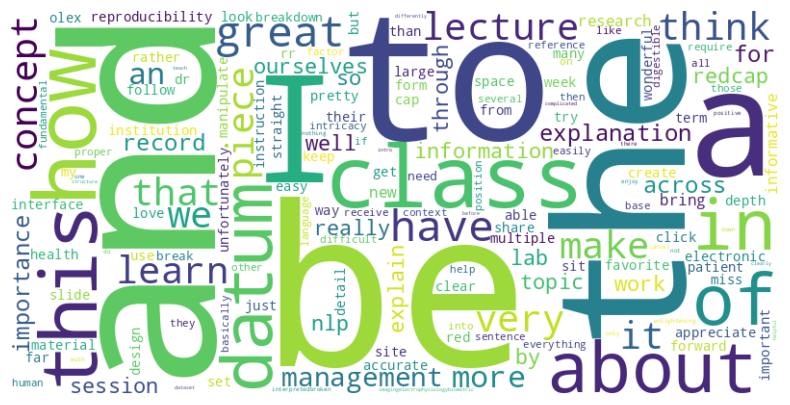

In [19]:
# Create using all words, so set stopwords to the Null set
# Combine all cleaned text into one string for word cloud generation
all_text = " ".join(df_subset['cleaned_text'])

# Create a word cloud with all words
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=set()).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Removal of Stop Words

Stopwords are thohse that are not very helpful to our task.  In the word cloud above, words like "and" and "the" are not helpful.  Spacy comes with it's oown set of default stop words.  LLets re-process the data to create a column that does not have any stop words and then regenerate the word cloud.

In [20]:
# Create a cleaning function removing stopwords
def clean_text_no_stopwords(text):
    # Remove non-ASCII characters (keep only standard English characters)
    text_ascii = text.encode('ascii', 'ignore').decode('ascii')
    # Remove extra spaces and lowercase
    text_cleaned = text_ascii.strip().lower()
    # Remove any remaining non-alphanumeric characters
    text_cleaned = re.sub(r'[^A-Za-z0-9\s.,!?\'\"-]', '', text_cleaned)
    # Process the cleaned text through spaCy for lemmatization and stopword removal
    doc = nlp(text_cleaned)
    # Return the lemmatized text without stopwords or punctuation
    return " ".join([token.lemma_ for token in doc if not token.is_stop])# and not token.is_punct])

# Apply and view the cleaned text column
df_subset['cleaned_text_no_stopwords'] = df_subset['positive_feedback'].apply(clean_text_no_stopwords)

/tmp/ipykernel_411620/1599691452.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['cleaned_text_no_stopwords'] = df_subset['positive_feedback'].apply(clean_text_no_stopwords)


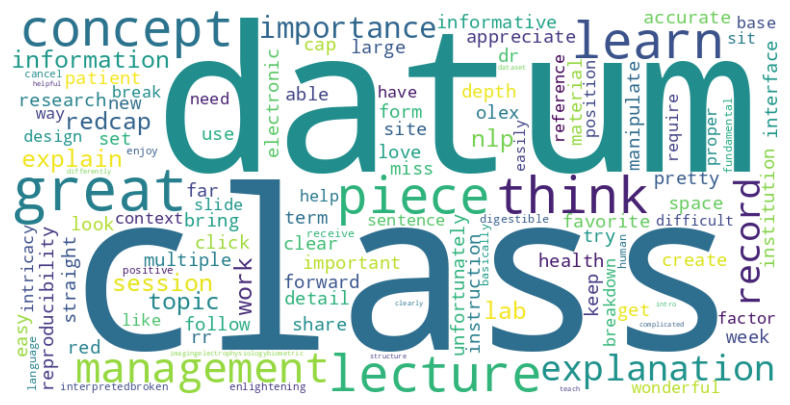

In [21]:
# Create using default SpaCy stopwords
all_text_no_stopwords = " ".join(df_subset['cleaned_text_no_stopwords'])

# Create a word cloud with stopwords removed
wordcloud_no_stopwords = WordCloud(width=800, height=400, background_color='white', stopwords=set()).generate(all_text_no_stopwords)

# Display the word cloud without stopwords
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_stopwords, interpolation='bilinear')
plt.axis("off")
plt.show()

### Custom Stopwords

The words "class" and "lecture" are not very helpful because these are class reviews, so we might want to add this as a stop word.

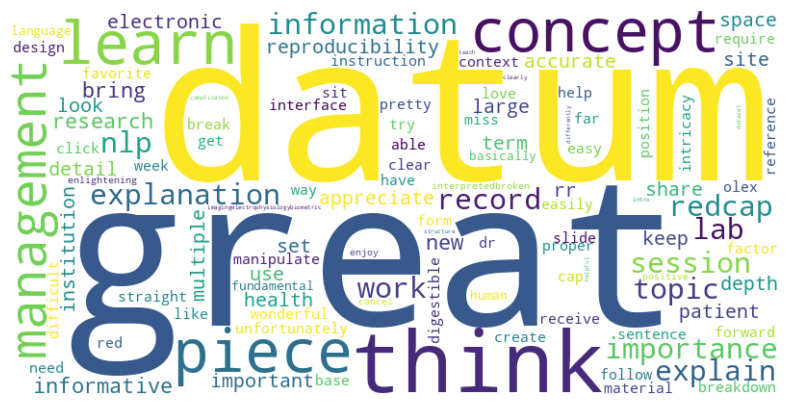

In [22]:
# Create using default SpaCy stopwords
all_text_no_stopwords = " ".join(df_subset['cleaned_text_no_stopwords'])

STOP_WORDS = ['class', 'lecture']

# Create a word cloud with stopwords removed
wordcloud_no_stopwords = WordCloud(width=800, height=400, background_color='white', stopwords=STOP_WORDS).generate(all_text_no_stopwords)

# Display the word cloud without stopwords
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_stopwords, interpolation='bilinear')
plt.axis("off")
plt.show()

# Part 5: On YOUR OWN

Can you copy and paste the blocks of code above to create a word cloud of the negative feedback?  You will need to 1) subset the df dataframe to use the negative_feedback column instead of the positive, 2) apply the data cleaning and stopword removal to the new subset dataframe, and 3) generate a word cloud image.

In [ ]:
## copy, paste and modify code to create a new subset df named "df_subset_neg" that contains the negative_feedback column instead of the positive.



In [ ]:
## copy, paste, and modify the 2 commands that will add thhe clean_text and clean_text_no_stopwords columns to your dataframe.
## Note you do not need to copy the whole functions as they will still be loaded in memory.  
## Just copy the 2 lines of code (hint: they are located iin different code cells.)



In [ ]:
## copy, paste and modify the code to generate the word cloud that does not contain stopwords.  
## Are there any stopwords you need to add after viewing it?  Edit the code to make that happen.



# Part 6: SpaCy

Lets take a closer look at the SpaCy NLP command: doc = nlp(text_cleaned)

In [23]:
## Create a Doc object to process the first positive feedback response in your dataset:
doc = nlp(df_subset['positive_feedback'][0])
doc

I thought this was an informative lecture and brought new concepts to the class- research and reproducibility is important, but I appreciated learning more about how R&R looks in terms of data management and in a space that uses large data sets.

### Get all annotations
When you just print out the doc as a string it prints your original text, but there is a lot of information packed in here!
The following functions use For loops to loop through each token in your input and extract out all the annotated data into a pandas dataframe.

In [24]:
## Functions to extract all NLP annotations.

def extract_tokens_plus_meta(doc:spacy.tokens.doc.Doc):
    """Extract tokens and metadata from individual spaCy doc."""
    return [
        (i.text, i.i, i.lemma_, i.ent_type_, i.tag_, 
         i.dep_, i.pos_, i.is_stop, i.is_alpha, 
         i.is_digit, i.is_punct) for i in doc
    ]

def tidy_tokens(docs):
    """Extract tokens and metadata from list of spaCy docs."""
    
    cols = [
        "doc_id", "token", "token_order", "lemma", 
        "ent_type", "tag", "dep", "pos", "is_stop", 
        "is_alpha", "is_digit", "is_punct"
    ]
    
    meta_df = []
    for ix, doc in enumerate(docs):
        
        if len(doc) > 0:
            meta = extract_tokens_plus_meta(doc)
            meta = pd.DataFrame(meta)
            meta.columns = cols[1:]
            #meta = meta.assign(doc_id = doc._.note_id).loc[:, cols]
            meta_df.append(meta)
        #else:
            #print("Excluding empty doc: " + str(doc._.note_id))
            #print(doc)
        
    return pd.concat(meta_df)  


In [25]:
tidy_doc = tidy_tokens([doc])
tidy_doc

token  token_order            lemma ent_type  tag       dep  \
0                 I            0                I           PRP     nsubj   
1           thought            1            think           VBD      ROOT   
2              this            2             this            DT     nsubj   
3               was            3               be           VBD     ccomp   
4                an            4               an            DT       det   
5       informative            5      informative            JJ      amod   
6           lecture            6          lecture            NN      attr   
7               and            7              and            CC        cc   
8           brought            8            bring           VBD      conj   
9               new            9              new            JJ      amod   
10         concepts           10          concept           NNS      dobj   
11               to           11               to            IN      prep   
12              the           12              the            DT       det   
13           class-           13           class-            NN  compound   
14         research           14         research            NN      pobj   
15              and           15              and            CC        cc   
16  reproducibility           16  reproducibility            NN      conj   
17               is           17               be           VBZ     ccomp   
18        important           18        important            JJ     acomp   
19                ,           19                ,             ,     punct   
20              but           20              but            CC        cc   
21                I           21                I           PRP     nsubj   
22      appreciated           22       appreciate           VBD      conj   
23         learning           23            learn           VBG     xcomp   
24             more           24             more           JJR      dobj   
25            about           25            about            IN      prep   
26              how           26              how           WRB    advmod   
27              R&R           27              R&R           NNP     nsubj   
28            looks           28             look           VBZ     pcomp   
29               in           29               in            IN      prep   
30            terms           30             term           NNS      pobj   
31               of           31               of            IN      prep   
32             data           32            datum           NNS  compound   
33       management           33       management            NN      pobj   
34              and           34              and            CC        cc   
35               in           35               in            IN      conj   
36                a           36                a            DT       det   
37            space           37            space            NN      pobj   
38             that           38             that           WDT     nsubj   
39             uses           39              use           VBZ     relcl   
40            large           40            large            JJ      amod   
41             data           41            datum           NNS  compound   
42             sets           42              set           NNS      dobj   
43                .           43                .             .     punct   

      pos  is_stop  is_alpha  is_digit  is_punct  
0    PRON     True      True     False     False  
1    VERB    False      True     False     False  
2    PRON     True      True     False     False  
3     AUX     True      True     False     False  
4     DET     True      True     False     False  
5     ADJ    False      True     False     False  
6    NOUN    False      True     False     False  
7   CCONJ     True      True     False     False  
8    VERB    False      True     False     False  
9     ADJ    False      True     False

### Get Lemma version your Doc

You can retireve the lemma version by using ".lemma_" with subsetting.  The ":" character mean "all tokens", or when used with numbers can mean 1 through 5 [1:5], 5 till the end [5:], or start to 5 [:5].  Try each of these out in the code block below.

In [26]:
## Get the lemma version of the sentence or parts of it.
doc[:].lemma_

'I think this be an informative lecture and bring new concept to the class- research and reproducibility be important, but I appreciate learn more about how R&R look in term of datum management and in a space that use large datum set.'

### Other information needs to be looped over.
The next block of code is using an in-line for loop to extract out the non-stopwords and concatenate them back into a sentence with the "join" function.

In [27]:
" ".join([token.lemma_ for token in doc if not token.is_stop])

'think informative lecture bring new concept class- research reproducibility important , appreciate learn R&R look term datum management space use large datum set .'

In [28]:
## now do the opposite by removing the word "not" 
" ".join([token.lemma_ for token in doc if token.is_stop])

'I this be an and to the and be but I more about how in of and in a that'

## Visualization

spaCy also has was to visualize the annotations.  Let visualize our feedback.  As we don't have any annotated entities in our data, we will visualize the dependencies.  However, if we did have entities it would look like the following: 


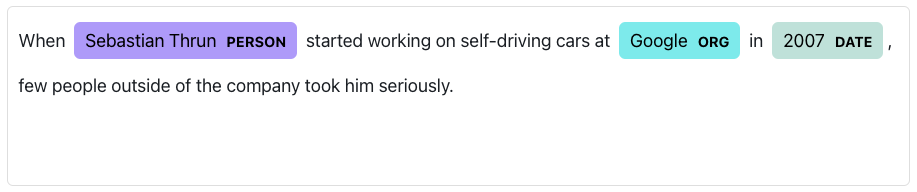

In [30]:
displacy.serve(doc, style="dep")

/lustre/home/stadtlerh/anaconda3/envs/env_cctr691/lib/python3.11/site-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


# Part 7: Import ALL feedback and run the above in bulk

Most of this section is streamlined to import the merged dataset I have prepared for you and running a subset of the same cleaning routines to prepare the data for TopEx analysis.  NOTE: We do not remove stopwords or punctuation because TopEx does that for us, and we do not need to lower case either.  We DO remove all non-ascii charaters and filter out odd punctuation. For inputing a dataset to Topex, any columns that have missing values should be removed. This can be done using the command ".dropna()" as shown below.

In [29]:
## import data file
# Import the DataFrame from the Excel file
file_path = '/lustre/home/cctr691/redcap_feedback_all_responses_Fall2024.xlsx'  
df_redcap = pd.read_excel(file_path)

# Display the first few rows of the exported DataFrame
df_redcap.head()

record_id                                    positive_aspect  \
0          1                                 Bringing an expert   
1          2                                                NaN   
2          3  The clear outline of the history of bioinforma...   
3          4  I thought it was an interesting topic area and...   
4          5  The historical background of the different ach...   

                                     negative_aspect       doc_id  
0                                               Time  Panguluri_0  
1                                                NaN  Panguluri_1  
2                                                NaN  Panguluri_2  
3  I thought it was a good lecture but I did miss...  Panguluri_3  
4                                               Time  Panguluri_4

In [31]:
# Subset the DataFrame to keep only the positive feedback columns
df_topex = df_redcap[['doc_id','positive_aspect']]
# We have NaN values this time, so lets remove them
df_topex.dropna(inplace=True)
df_topex.head()

/tmp/ipykernel_411620/3483004987.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topex.dropna(inplace=True)


doc_id                                    positive_aspect
0  Panguluri_0                                 Bringing an expert
2  Panguluri_2  The clear outline of the history of bioinforma...
3  Panguluri_3  I thought it was an interesting topic area and...
4  Panguluri_4  The historical background of the different ach...
5  Panguluri_5  Learning about generative AI was very intrigui...

In [32]:
# Create a cleaning function including stopwords
def clean_minimal(text):
    # Remove non-ASCII characters (keep only standard English characters)
    text_ascii = text.encode('ascii', 'ignore').decode('ascii')
    # Remove extra spaces and lowercase
    text_cleaned = text_ascii.strip()
    # Remove any remaining non-alphanumeric characters
    text_cleaned = re.sub(r'[^A-Za-z0-9\s.,!?\'\"-]', '', text_cleaned)
    
    # Return the cleaned text
    return text_cleaned

In [33]:
# Apply and view the cleaned text column
df_topex['Text'] = df_topex['positive_aspect'].apply(clean_minimal)
df_topex

/tmp/ipykernel_411620/2051872269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topex['Text'] = df_topex['positive_aspect'].apply(clean_minimal)


doc_id                                    positive_aspect  \
0   Panguluri_0                                 Bringing an expert   
2   Panguluri_2  The clear outline of the history of bioinforma...   
3   Panguluri_3  I thought it was an interesting topic area and...   
4   Panguluri_4  The historical background of the different ach...   
5   Panguluri_5  Learning about generative AI was very intrigui...   
..          ...                                                ...   
79     Gibson_4  learned how to tell a computer how to make pb&...   
80     Gibson_5    A good introduction into spatial bioinformatics   
81     Gibson_6  The basic concepts needed to understand the to...   
82     Gibson_7  I thought it was a very interesting talk! Noth...   
83     Gibson_8  This was an excellent overview of python for b...   

                                                 Text  
0                                  Bringing an expert  
2   The clear outline of the history of bioinforma...  
3   I thought it was an interesting topic area and...  
4   The historical background of the different ach...  
5   Learning about generative AI was very intrigui...  
..                                                ...  
79   learned how to tell a computer how to make pbjs   
80    A good introduction into spatial bioinformatics  
81  The basic concepts needed to understand the to...  
82  I thought it was a very interesting talk! Noth...  
83  This was an excellent overview of python for b...  

[76 rows x 3 columns]

Save only the doc_id and Text columns to an Excel file for TopEx.

In [34]:
# Save the data to a text file
df_topex[['doc_id','Text']].to_excel('top_ex_ready_data.xlsx', index=False)


# Part 8: TopEx Analysis

- Download the file you just created on Athena to your desktop.

- Go to [http://topex.cctr.vcu.edu/](http://topex.cctr.vcu.edu/)

- Using the hamburger menu on the left, click on the "From Excel File" option and upload this Excel file to the TopEx platform.

- Click "Run TopEx" button and see what you get without any parameter modifications.

- Answer the questions below...

## Question 1: 
What are your observations of the default analysis?  Does it look useful?

Answer: Not particularly useful because the default settings call for 20 clusters, which is a lot to interpret, especially when there were less than 20 surveys total. We should cut down the total number of clusters that this program identifies in order to be more useful for our purposes. 

## Question 2: 
Set the clustering method to Kmeans with Euclidean distance. Then play with the number of cluster, vectorization method, window size and visualization parameters.  Find a set that looks good to you and gives you some information.  Type those settings below and copy the scatter plot image and paste it below.  Also describe what type of cluster topics you found. For the image, you can take a screen shot and just paste it in from the clipboard.

Optimal Parameters: Window Size=5, Vectorization method=svd, number of clusters=5, visualization methods=svd

Cluster Topic Summary: The 5 clusters had varrying topics; for example, cluster 0 contained topics such as introduction/overview, cluster 1 contained topics such as learn/think/helpful, cluster 2 contained topics such as understand/instruction, etc. I played around with the settings for a while, and even though there are some overlapping themes between these clusters, I think that's reflective of a small data set that includes surveys from people who are similarly impressed with the course.   

Scatter Plot Image: 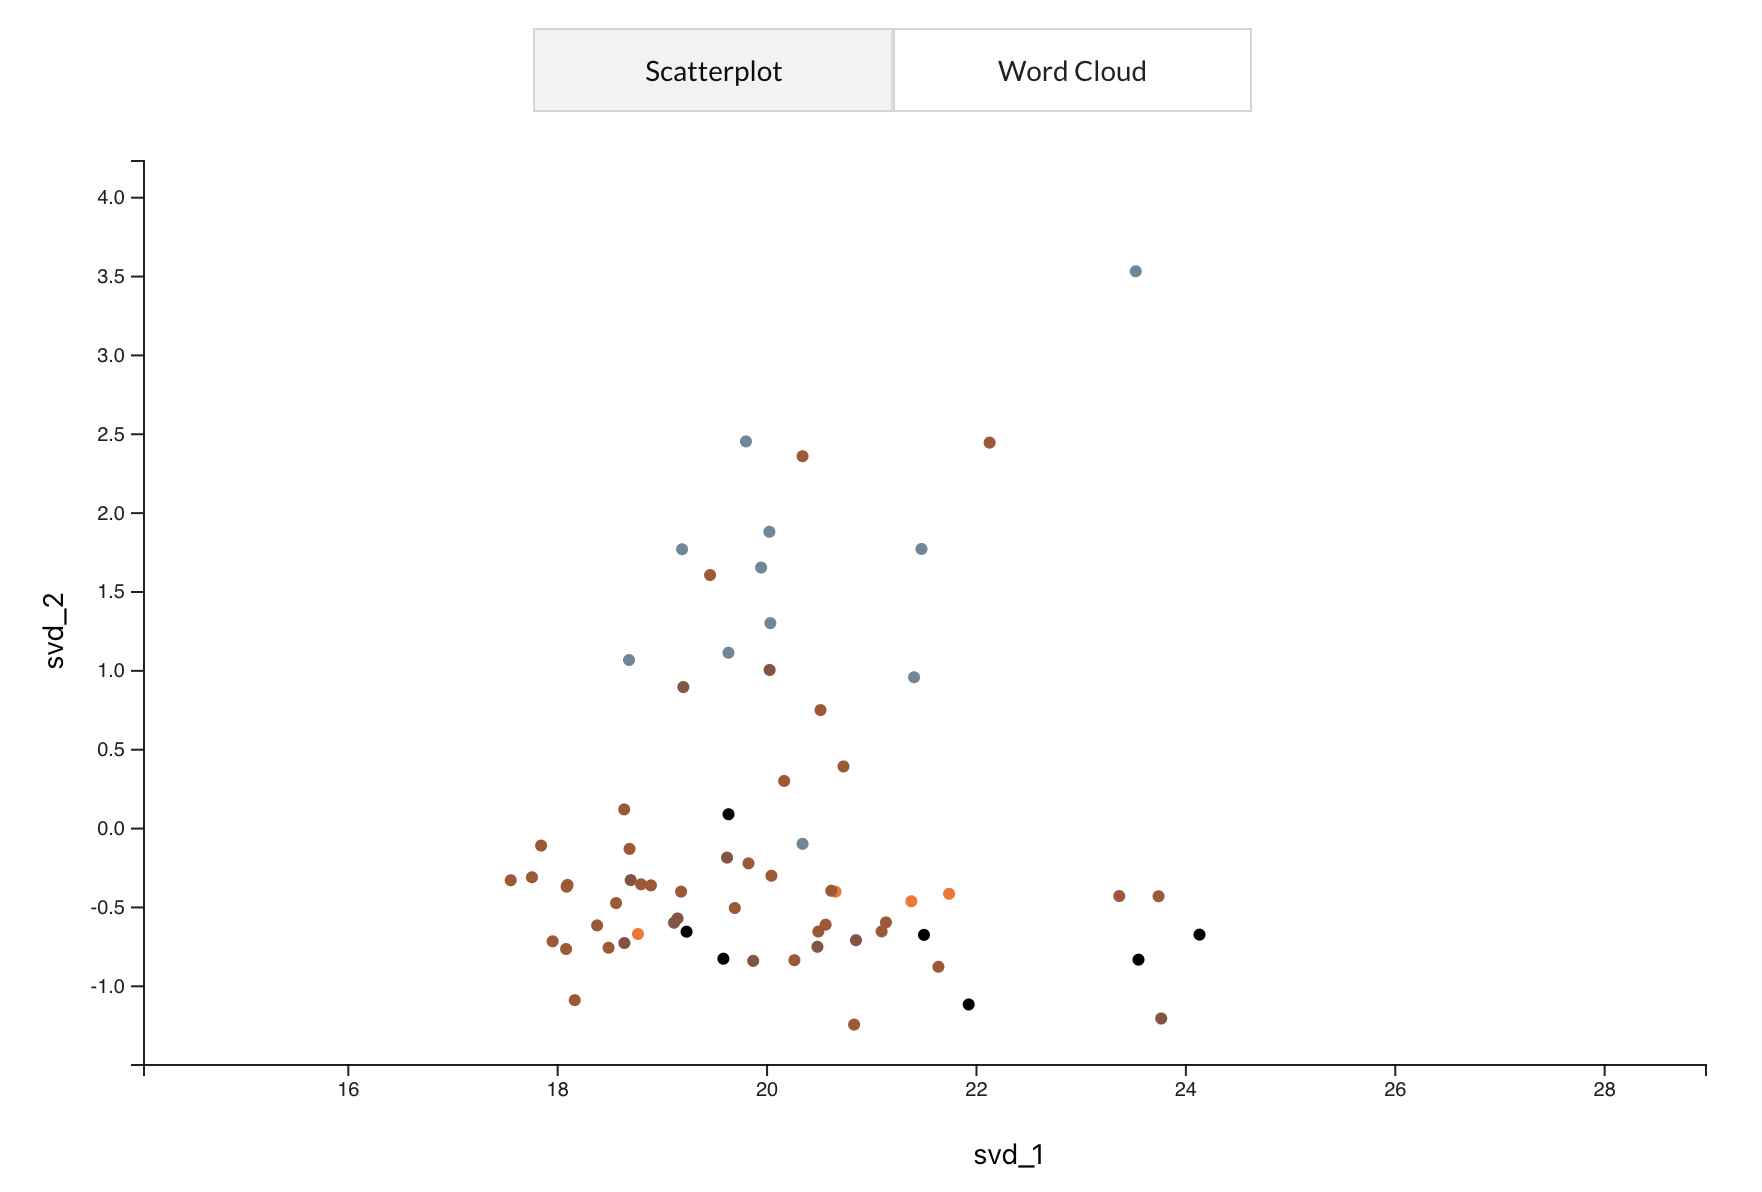

## Question 3: 
Review the wordcloud plots.  are there any frequent words that are not helpful?  Pick a few and create a custom stopwords file. This is just a text file with one word per line, all lowercase.  Upload this file and rerun your analysis keeping all your optimal parameters.  How did this change your data?

Answer: One of the word plots that popped up on my cloud that was unhelpful was "bioinformatic", obviously because that's the name of the class. 

Scatter Plot Image: 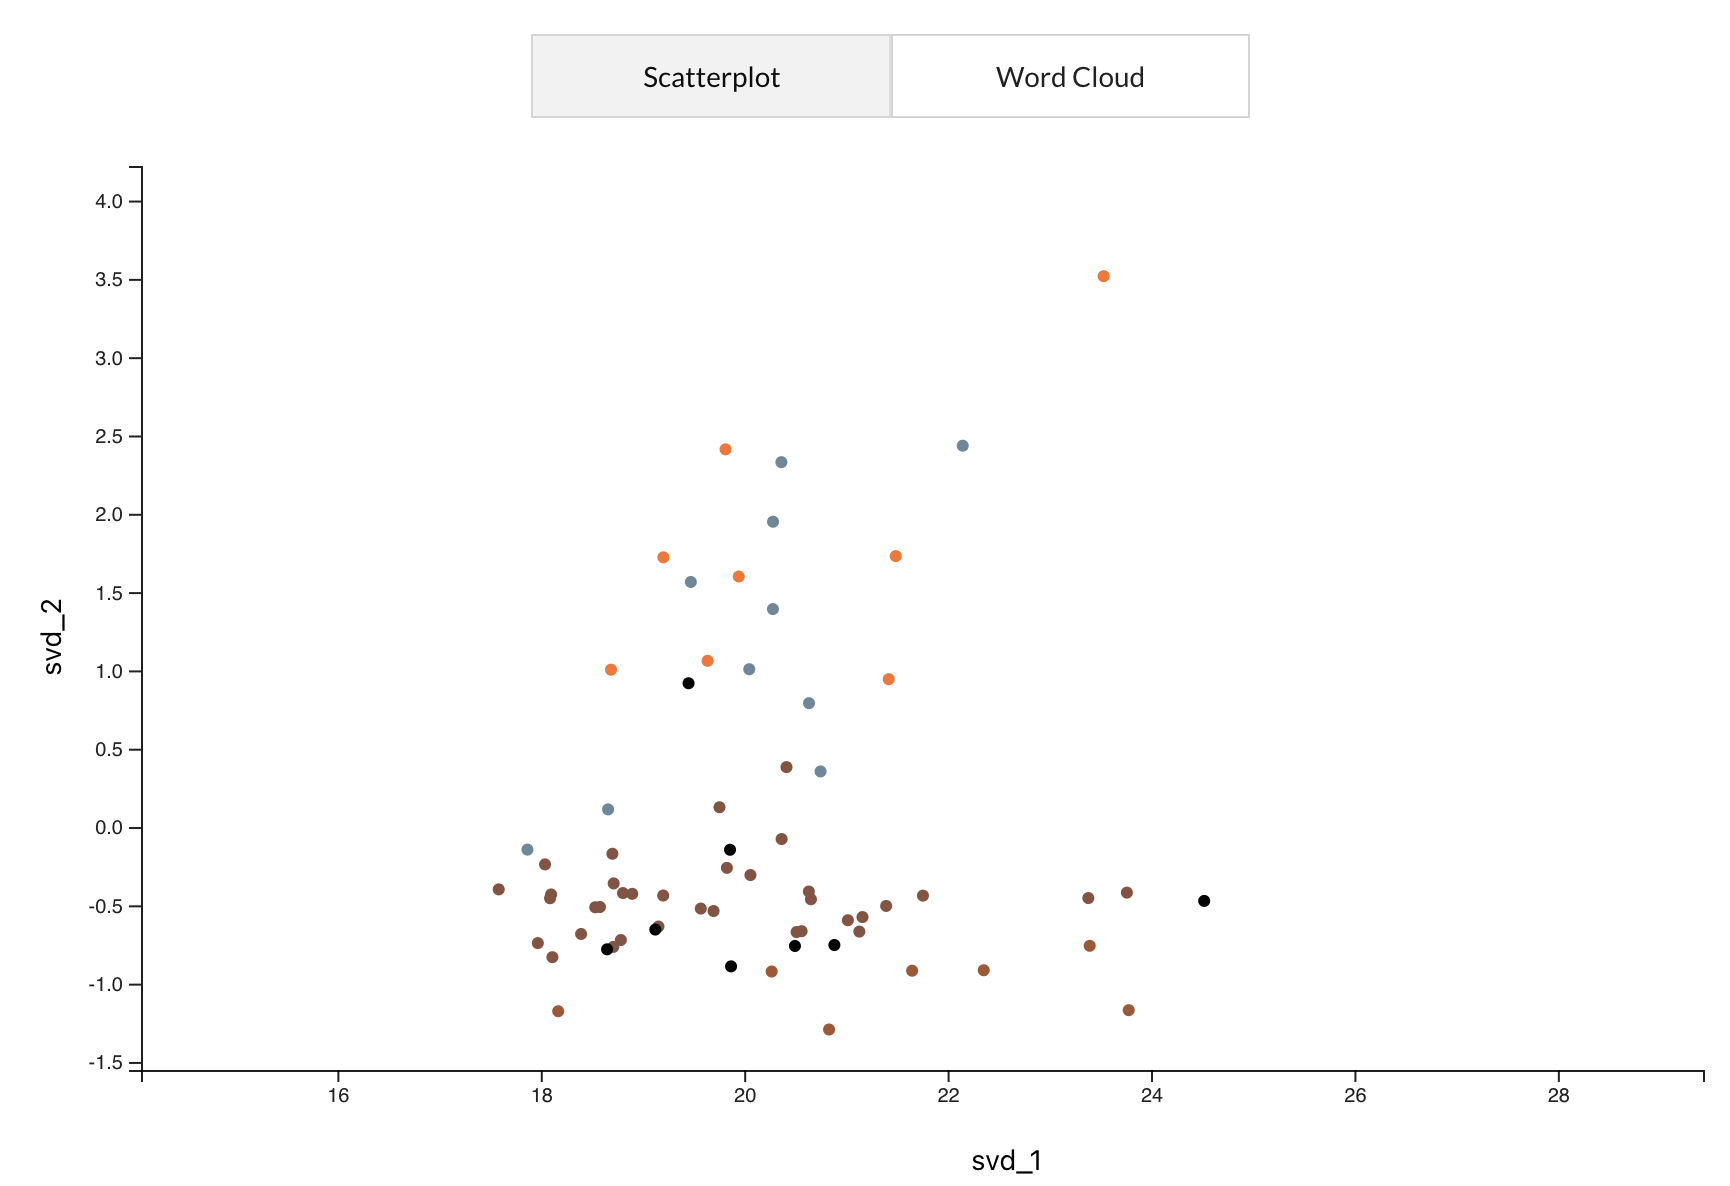

# Appendix: Kaggle Dataset Analysis

This appendix contains code to analyze a Harvard reviews Kaggle dataset.  This data has more information in it, so you will get a more interesting TopEx analysis.  In addition, these reviews are in multiple languages, so we utilize a new package to detect the language and filter it to only those that are English.


In [35]:
from langdetect import detect
import kagglehub

/lustre/home/stadtlerh/anaconda3/envs/env_cctr691/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Importing and Looking at our Data:

In [36]:
# Download latest version
path = kagglehub.dataset_download("kanchana1990/harvard-university-ratings-and-reviews")

print("Path to dataset files:", path)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 475k/475k [00:00<00:00, 5.51MB/s]

Extracting files...


Path to dataset files: /lustre/home/stadtlerh/.cache/kagglehub/datasets/kanchana1990/harvard-university-ratings-and-reviews/versions/1


In [37]:
#Load data from a csv file into a pandas DataFrame
file_path = path+'/harvard_reviews.csv'  # create the full file path
df = pd.read_csv(file_path) # you can instead use the command "pd.read_excel()" for .xlsx files

#Display the first few rows of the DataFrame to ensure it's loaded correctly
df.head()

published_date published_platform  rating    type  \
0  2023-12-28T08:02:14-05:00             Mobile       5  review   
1  2023-12-12T00:38:26-05:00            Desktop       4  review   
2  2023-12-10T08:21:35-05:00             Mobile       3  review   
3  2023-11-07T21:20:21-05:00            Desktop       4  review   
4  2023-10-02T17:40:42-04:00            Desktop       5  review   

   helpful_votes                                              title  \
0              0                 Best classes and good environment    
1              0                                 Harvard University   
2              0                                 Walk around campus   
3              0                     Interesting Harvard University   
4              0  Lovely university campus has many historic and...   

                                                text  
0  Good thanks for everything good work group üëç h...  
1  Harvard University was founded in 1636 and is ...  
2  We did a walk around most of the Harvard Campu...  
3  We had a walk through the university grounds w...  
4  Finally made it to Harvard!!  This iconic univ...

In [38]:
## create a unique index for our data
#Create a new column with a unique ID for each row
df["Doc_ID"] = 'Doc_' + df.index.astype(str)
df.tail()

published_date published_platform  rating    type  \
3179  2010-10-29T05:47:57-04:00            Desktop       3  review   
3180  2010-08-23T06:08:51-04:00            Desktop       3  review   
3181  2010-08-23T00:06:41-04:00            Desktop       5  review   
3182  2010-06-03T07:37:36-04:00            Desktop       5  review   
3183  2009-09-27T16:39:18-04:00            Desktop       5  review   

      helpful_votes                                              title  \
3179              0               amerikanischer campus fuer touristen   
3180              0                               Weniger als erwartet   
3181              0                              bellissima universit√†   
3182              2  Tolle Universit√§t, definitiv einen Abstecher wert   
3183              1                                            ‰∏ÄÂ∫¶„ÅØË°å„Åè„Åπ„Åç   

                                                   text    Doc_ID  
3179  wenn man in boston ist hat manmeistens zeit au...  Doc_3179  
3180  Von der F√ºhrung der Harvard University erhofft...  Doc_3180  
3181  da vedere questa citt√†, studio sede di una del...  Doc_3181  
3182  Hallo,\nich habe ein Jahr an der Harvard Law S...  Doc_3182  
3183  „Å®„Å¶„ÇÇÊ≠¥Âè≤„ÅÆ„ÅÇ„ÇãÁ¥†Êïµ„Å™Âª∫Áâ©„Åß„Åô„ÄÇ„Éè„Éº„Éê„Éº„Éâ„Çπ„ÇØ„Ç®„Ç¢„Éº„ÅÆÈßÖ„ÅÆËøë„Åè„Åã„ÇâÁÑ°Êñô„ÅÆ„ÉÑ„Ç¢„ÉºÔºàËã±Ë™ûÔºâ„Çí„Éè„Éº...  Doc_3183

### Language Detection

We can detect any non-English text and remove it from the analysis using the command "detect" from the library "langdetect".

In [39]:
# Check for any non-English text and remove it
# First add a new column to the dataset with the detected language
df['language'] = df['text'].apply(lambda x: detect(x) if pd.notnull(x) else 'unknown')

# Identify the distribution of languages and plot them
language_counts = df['language'].value_counts()
print("\nLanguage Distribution in Text:\n", language_counts)

# Finally, keep on the data rows that are English
df = df[df['language'] == 'en']  # Keep only English rows
df


Language Distribution in Text:
 language
en       1917
es        359
pt        314
it        158
fr        134
ja         75
de         58
ru         36
ko         29
nl         25
zh-cn      22
sv          9
tr          9
el          8
da          7
id          6
zh-tw       5
pl          3
no          3
he          2
th          2
hu          1
ar          1
sk          1
Name: count, dtype: int64


published_date published_platform  rating    type  \
0     2023-12-28T08:02:14-05:00             Mobile       5  review   
1     2023-12-12T00:38:26-05:00            Desktop       4  review   
2     2023-12-10T08:21:35-05:00             Mobile       3  review   
3     2023-11-07T21:20:21-05:00            Desktop       4  review   
4     2023-10-02T17:40:42-04:00            Desktop       5  review   
...                         ...                ...     ...     ...   
1912  2011-02-23T05:35:04-05:00            Desktop       5  review   
1913  2011-01-28T11:06:10-05:00            Desktop       5  review   
1914  2009-07-14T10:33:17-04:00            Desktop       5  review   
1915  2009-02-10T20:05:18-05:00            Desktop       4  review   
1916  2006-04-29T20:00:00-04:00            Desktop       5  review   

      helpful_votes                                              title  \
0                 0                 Best classes and good environment    
1                 0                                 Harvard University   
2                 0                                 Walk around campus   
3                 0                     Interesting Harvard University   
4                 0  Lovely university campus has many historic and...   
...             ...                                                ...   
1912              5  Be sure to visit not only the old-yard! Severa...   
1913              1     High energy tour...great for tweens and teens!   
1914              4               Tour of Harvard University - A must!   
1915              3                     The Most Student Friendly City   
1916              3                    Wandering the Unviersity Campus   

                                                   text    Doc_ID language  
0     Good thanks for everything good work group üëç h...     Doc_0       en  
1     Harvard University was founded in 1636 and is ...     Doc_1       en  
2     We did a walk around most of the Harvard Campu...     Doc_2       en  
3     We had a walk through the university grounds w...     Doc_3       en  
4     Finally made it to Harvard!!  This iconic univ...     Doc_4       en  
...                                                 ...       ...      ...  
1912  Most tourists visit only the Harvard old-yard ...  Doc_1912       en  
1913  We highly recommend the "Hahvahd" Tour guided ...  Doc_1913       en  
1914  On our recent vacation to Boston, we wanted to...  Doc_1914       en  
1915  A stay in Boston is incomplete without a visit...  Doc_1915       en  
1916  Wandering around the Cambridge campus of Harva...  Doc_1916       en  

[1917 rows x 9 columns]

### Clean the text and Word Cloud Viz

Next, we can generate a word cloud from the remaining data to visualize frequency of major themes using the function "WordCloud()". We can generate one without stopwords and and one with them. We can check the list of stopwords included by default in spaCy using "print(nlp.Defaults.stop_words)".
WordCloud removes stopwords by default, therefore to disable this feature we need to add "stopwords=set()" as a parameter.

In [40]:
# Create a cleaning function including stopwords
def clean_text(text):
    # Remove non-ASCII characters (keep only standard English characters)
    text_ascii = text.encode('ascii', 'ignore').decode('ascii')
    # Remove extra spaces and lowercase
    text_cleaned = text_ascii.strip().lower()
    # Remove any remaining non-alphanumeric characters
    text_cleaned = re.sub(r'[^A-Za-z0-9\s.,!?\'\"-]', '', text_cleaned)
    # Process the cleaned text through spaCy for lemmatization and stopword removal
    doc = nlp(text_cleaned)
    # Return the lemmatized text
    return " ".join([token.lemma_ for token in doc])# if not token.is_punct])

# Create a cleaning function removing stopwords
def clean_text_no_stopwords(text):
    # Remove non-ASCII characters (keep only standard English characters)
    text_ascii = text.encode('ascii', 'ignore').decode('ascii')
    # Remove extra spaces and lowercase
    text_cleaned = text_ascii.strip().lower()
    # Remove any remaining non-alphanumeric characters
    text_cleaned = re.sub(r'[^A-Za-z0-9\s.,!?\'\"-]', '', text_cleaned)
    # Process the cleaned text through spaCy for lemmatization and stopword removal
    doc = nlp(text_cleaned)
    # Return the lemmatized text without stopwords or punctuation
    return " ".join([token.lemma_ for token in doc if not token.is_stop])# and not token.is_punct])

# Apply and view the cleaned text column
df['cleaned_text'] = df['text'].apply(clean_text)
df['cleaned_text_no_stopwords'] = df['text'].apply(clean_text_no_stopwords)
df[['text', 'cleaned_text','cleaned_text_no_stopwords']].head()

text  \
0  Good thanks for everything good work group üëç h...   
1  Harvard University was founded in 1636 and is ...   
2  We did a walk around most of the Harvard Campu...   
3  We had a walk through the university grounds w...   
4  Finally made it to Harvard!!  This iconic univ...   

                                        cleaned_text  \
0  good thank for everything good work group   ha...   
1  harvard university be found in 1636 and be   a...   
2  we do a walk around most of the harvard campus...   
3  we have a walk through the university ground w...   
4  finally make it to harvard ! !   this iconic u...   

                           cleaned_text_no_stopwords  
0  good thank good work group   harverd good coll...  
1  harvard university found 1636   private ivy le...  
2  walk harvard campus , beautiful old , expect b...  
3  walk university ground tour guide - tour cruis...  
4  finally harvard ! !   iconic university campus...

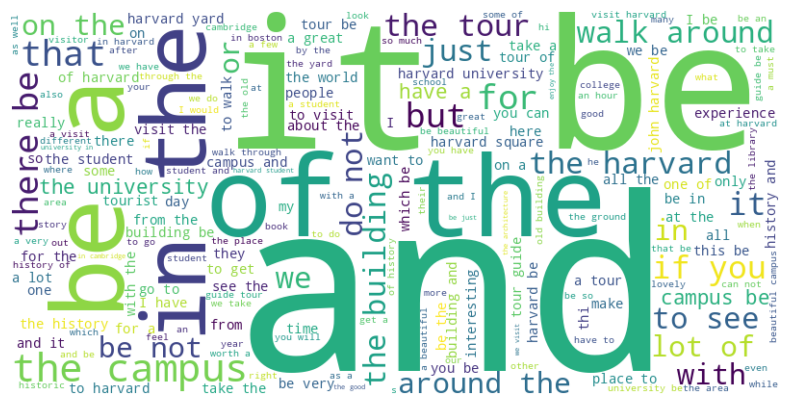

In [41]:
# Create using all words, so set stopwords to the Null set
# Combine all cleaned text into one string for word cloud generation
all_text = " ".join(df['cleaned_text'])

# Create a word cloud with all words
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=set()).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

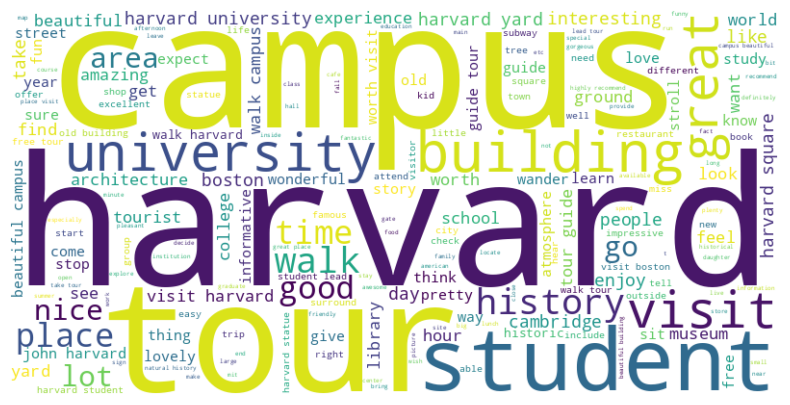

In [42]:
# Create using default SpaCy stopwords
all_text_no_stopwords = " ".join(df['cleaned_text_no_stopwords'])

# Create a word cloud with stopwords removed
wordcloud_no_stopwords = WordCloud(width=800, height=400, background_color='white', stopwords=set()).generate(all_text_no_stopwords)

# Display the word cloud without stopwords
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_stopwords, interpolation='bilinear')
plt.axis("off")
plt.show()

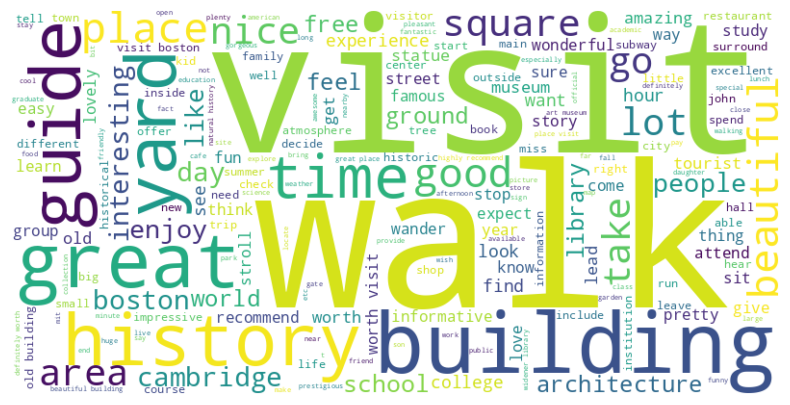

In [43]:
# Create using default stop words PLUS custom stop words
all_text_no_stopwords = " ".join(df['cleaned_text_no_stopwords'])

STOP_WORDS = ['harvard', 'university', 'campus','tour','student']

# Create a word cloud with stopwords removed
wordcloud_no_stopwords = WordCloud(width=800, height=400, background_color='white', stopwords=STOP_WORDS).generate(all_text_no_stopwords)

# Display the word cloud without stopwords
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_stopwords, interpolation='bilinear')
plt.axis("off")
plt.show()

## Prep Harvard Dataset for TopEx

In [45]:
# Subset the DataFrame to keep only specific columns and remove NA values
df_subset = df[['Doc_ID', 'text']]

# Drop NA values
df_subset.dropna(inplace=True)

# Rename column
df_subset.rename(columns={'text': 'Text'}, inplace=True)

# Export the DataFrame to an Excel file
# Note we are only exporting a subset of the data because TopEx was crashing on the full dataset as the online server is small.
df_subset[0:800].to_excel('/lustre/home/stadtlerh/CCTR691/24.10.24_NLPLab/top_ex_ready_data_Harvard.xlsx', index=False)


/tmp/ipykernel_411620/2668860105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.dropna(inplace=True)
/tmp/ipykernel_411620/2668860105.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.rename(columns={'text': 'Text'}, inplace=True)


## TopEx Analysis

Like before, go to your Athena drive and download this dataset.  Then import into TopEx and explor as before!

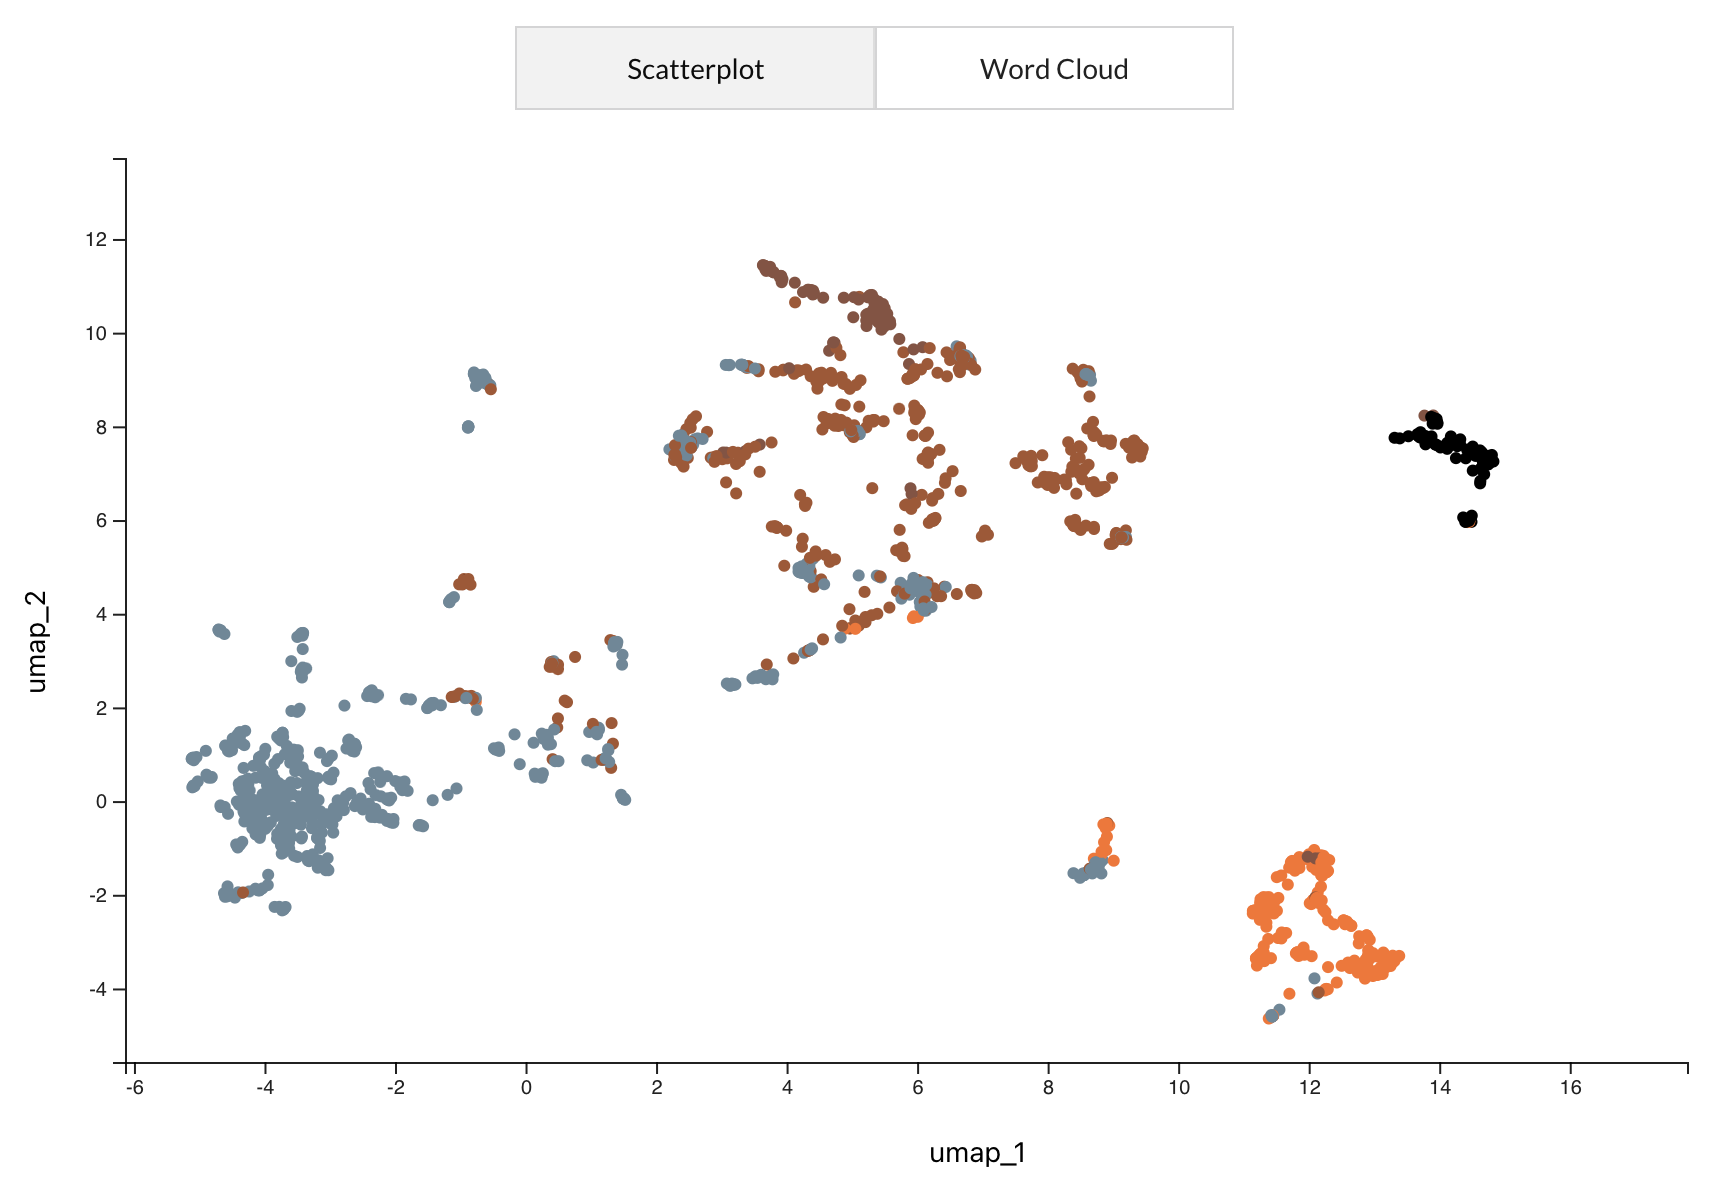

# Appendix

The follow code is what I used to create the csv file you just imported

In [ ]:
api_keys_auto = {'Panguluri':'30B03AD44291C56E3D07D88B8648E7D2','Way':'1D044BDD3F1F11A87AC84403F351F2F8',
            'AbaidooMyles':'2039C03ADF1B1F416AD5ED3E017CBAC1','Naik':'3F1D8C07B623DF87A43C08ABB29E14C9'}

api_keys_manual = {'Stadtler':'ABA571C5EC78E3FB8D4008DABA5DB182','Camarena':'BCAD8BD1240AC6097E933DA55FA183AC',
            'Abosamak':'DBFCC6C880132E475475FDF0C896F3DF','Gibson':'65416D1024A6EC2FFE39613FBE92A017'}

In [ ]:
main_df = pd.DataFrame()
for k,v in api_keys_auto.items():
    data = {
        'token': v,
        'content': 'record',
        'action': 'export',
        'format': 'csv',
        'type': 'flat',
        'csvDelimiter': '',
        'rawOrLabel': 'raw',
        'rawOrLabelHeaders': 'raw',
        'exportCheckboxLabel': 'false',
        'exportSurveyFields': 'false',
        'exportDataAccessGroups': 'false',
        'returnFormat': 'json'
    }

    api_data = requests.post('https://redcap.vcu.edu/api/',data=data)
    df = pd.read_csv(StringIO(api_data.text), sep=",").iloc[:,[0,7,8]]
    df['doc_id'] = k + "_" + df.index.astype(str)
    main_df = pd.concat([main_df,df])
    
main_df    

In [ ]:
## Set up REDCap Connection
api_keys_manual = {'Stadtler':'ABA571C5EC78E3FB8D4008DABA5DB182','Camarena':'BCAD8BD1240AC6097E933DA55FA183AC',
            'Abosamak':'DBFCC6C880132E475475FDF0C896F3DF','Gibson':'65416D1024A6EC2FFE39613FBE92A017'}



In [ ]:
api_keys_manual['Stadtler']

In [ ]:
## Stadtler
data = {
        'token': api_keys_manual['Stadtler'],
        'content': 'record',
        'action': 'export',
        'format': 'csv',
        'type': 'flat',
        'csvDelimiter': '',
        'rawOrLabel': 'raw',
        'rawOrLabelHeaders': 'raw',
        'exportCheckboxLabel': 'false',
        'exportSurveyFields': 'false',
        'exportDataAccessGroups': 'false',
        'returnFormat': 'json'
    }

api_data = requests.post('https://redcap.vcu.edu/api/',data=data)
df = pd.read_csv(StringIO(api_data.text), sep=",").iloc[:,[0,15,16]]
df.rename(columns={'positive_feedback': 'positive_aspect', 'negative_feedback': 'negative_aspect'}, inplace=True)
df['doc_id'] = "Stadtler_" + df.index.astype(str)
main_df = pd.concat([main_df,df])
    

In [ ]:
## Camarena
data = {
        'token': api_keys_manual['Camarena'],
        'content': 'record',
        'action': 'export',
        'format': 'csv',
        'type': 'flat',
        'csvDelimiter': '',
        'rawOrLabel': 'raw',
        'rawOrLabelHeaders': 'raw',
        'exportCheckboxLabel': 'false',
        'exportSurveyFields': 'false',
        'exportDataAccessGroups': 'false',
        'returnFormat': 'json'
    }

api_data = requests.post('https://redcap.vcu.edu/api/',data=data)
df = pd.read_csv(StringIO(api_data.text), sep=",").iloc[:,[0,7,8]]

df.rename(columns={'escribe_1_or_more_specific_positive_aspect_s_of_this_lecture_that_you_liked_or_were_accessible_to_y': 'positive_aspect', 'describe_1_or_more_specifi': 'negative_aspect'}, inplace=True)
df['doc_id'] = "Camarena_" + df.index.astype(str)
main_df = pd.concat([main_df,df])



In [ ]:
## Abosamak
data = {
        'token': api_keys_manual['Abosamak'],
        'content': 'record',
        'action': 'export',
        'format': 'csv',
        'type': 'flat',
        'csvDelimiter': '',
        'rawOrLabel': 'raw',
        'rawOrLabelHeaders': 'raw',
        'exportCheckboxLabel': 'false',
        'exportSurveyFields': 'false',
        'exportDataAccessGroups': 'false',
        'returnFormat': 'json'
    }

api_data = requests.post('https://redcap.vcu.edu/api/',data=data)
df = pd.read_csv(StringIO(api_data.text), sep=",").iloc[:,[0,7,8]]
df.columns
df.rename(columns={'positive_txt': 'positive_aspect', 'negative_txt': 'negative_aspect'}, inplace=True)
df['doc_id'] = "Abosamak_" + df.index.astype(str)
main_df = pd.concat([main_df,df])

In [ ]:
## Gibson
data = {
        'token': api_keys_manual['Gibson'],
        'content': 'record',
        'action': 'export',
        'format': 'csv',
        'type': 'flat',
        'csvDelimiter': '',
        'rawOrLabel': 'raw',
        'rawOrLabelHeaders': 'raw',
        'exportCheckboxLabel': 'false',
        'exportSurveyFields': 'false',
        'exportDataAccessGroups': 'false',
        'returnFormat': 'json'
    }

api_data = requests.post('https://redcap.vcu.edu/api/',data=data)
df = pd.read_csv(StringIO(api_data.text), sep=",").iloc[:,[0,8,9]]
df.columns
df.rename(columns={'positive_aspects': 'positive_aspect', 'negative_aspects': 'negative_aspect'}, inplace=True)
df['doc_id'] = "Gibson_" + df.index.astype(str)
main_df = pd.concat([main_df,df])

In [ ]:
main_df.shape


In [ ]:
# Export the DataFrame to an Excel file
main_df.to_excel('/lustre/home/cctr691/redcap_feedback_all_responses_Fall2024.xlsx', index=False)


In [ ]:
# Create a cleaning function including stopwords
def clean_minimal(text):
    # Remove non-ASCII characters (keep only standard English characters)
    text_ascii = text.encode('ascii', 'ignore').decode('ascii')
    # Remove extra spaces and lowercase
    text_cleaned = text_ascii.strip().lower()
    # Remove any remaining non-alphanumeric characters
    text_cleaned = re.sub(r'[^A-Za-z0-9\s.,!?\'\"-]', '', text_cleaned)
    
    # Return the cleaned text
    return text_cleaned